In [1]:
import numpy as np
import pandas as pd
import struct
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
sns.set_style('darkgrid')
import sys
import os

In [2]:
def read_file(file_name):
    array = np.loadtxt(file_name)
    data = list(zip(*array))
    return data

def potential_plot(mu, T, R, folder): #build plot for longitudinal
    w=mu//10
    q=mu-w*10
    print(mu, T, R)
    data= read_file('/home/ilya/lattice/flux_tube/result/abelian/data/' + folder + '/mu0.%d%d/electric_T=%d_R=%d' % (w, q, T, R))
    plt.errorbar(data[0], data[1])
    plt.show()
    plt.clf()

def T_dependence(mu, T, R):
    x = []
    y = []
    yerr = []
    for i in T:
        w=mu//10
        q=mu-w*10
        data = read_file('/home/ilya/lattice/flux_tube/result/abelian/data/mon_wl/mu0.%d%d/electric_T=%d_R=%d' % (w, q, i, R))
        x.append(i)
        y.append(data[1][R//2])
        yerr.append(data[2][R//2])
    plt.errorbar(x, y, yerr=yerr)
    plt.show()
    plt.clf()
    
def plot_multiple(data, data_names, data_xlabel, data_ylabel, legend_names): # plot several results together
    plot_num = len(data)
    fig, axes = plt.subplots(nrows = 1, ncols = plot_num, sharey = True, figsize=(12,7))
    if len(data) == 1:
        axes = [axes]
    for i in range(len(data)):
        m = []
        axes[i].set_title(data_names[i])
        axes[i].set_xlabel(data_xlabel)
        if i==0:
            axes[i].set_ylabel(data_ylabel)
        for j in range(len(data[i])):
            m1 = axes[i].errorbar(data[i][j][0], data[i][j][1], yerr = data[i][j][2])
            m.append(m1)
        if i == (len(data)-1):
            axes[i].legend(m, legend_names)
    
    #plt.show()
    #plt.clf()
    
def make_plots_X(mu, X, X_names, j, legend_name, data_xlabel, data_ylabel, titles, types, direction, directory):
    w=mu//10
    q=mu-w*10
    data = []
    data1 = []
    data2 = []
    data3 = []
    data4 = []
    legend_names = []
    A = X[0]
    B = X[1]
    for i in X[j]:
        legend_names.append(legend_name + '=%d' % (i))
    for T in A:
        for R in B:
            data1.append(read_file('/home/ilya/lattice/observables/data/flux_tube/' + directory + '/mu0.%d%d/' % (w, q) + types[0] + direction + '_T=%d_R=%d' % (T, R)))
            data2.append(read_file('/home/ilya/lattice/observables/data/flux_tube/' + directory + '/mu0.%d%d/' % (w, q) + types[1] + direction + '_T=%d_R=%d' % (T, R)))
    data.append(data1)
    data.append(data2)
    plot_multiple(data, titles, data_xlabel, data_ylabel, legend_names)
    output = '/home/ilya/lattice/observables/images/flux_tube/' + directory + '/mu0.%d%d/' % (w, q) + types[0] + '_' + types[1] + '_mu=%d_' % (mu) + X_names[0] + '=%d_' % (X[(j+1)%2][0])+ X_names[1] + '=%d-%d' % (X[j][0], X[j][len(X[j])-1])
    plt.savefig(output, format='pdf')
    plt.show()
    plt.clf()
    
def make_plots_together(mu, T, R, data_xlabel, data_ylabel, titles, types, direction):
    w=mu//10
    q=mu-w*10
    data = []
    data1 = []
    data2 = []
    data3 = []
    legend_names = []
    legend_names.append('mag')
    legend_names.append('offd')
    legend_names.append('mon')
    data1.append(read_file('/home/ilya/lattice/observables/data/flux_tube/mag/HYP_APE/mu0.%d%d/' % (w, q) + types[0] + direction + '_T=%d_R=%d' % (T, R)))
    data2.append(read_file('/home/ilya/lattice/observables/data/flux_tube/mag/HYP_APE/mu0.%d%d/' % (w, q) + types[1] + direction + '_T=%d_R=%d' % (T, R)))
    data1.append(read_file('/home/ilya/lattice/observables/data/flux_tube/offd/HYP_APE/mu0.%d%d/' % (w, q) + types[0] + direction + '_T=%d_R=%d' % (T, R)))
    data2.append(read_file('/home/ilya/lattice/observables/data/flux_tube/offd/HYP_APE/mu0.%d%d/' % (w, q) + types[1] + direction + '_T=%d_R=%d' % (T, R)))
    #data1.append(read_file('/home/ilya/lattice/observables/data/flux_tube/su2/HYP_APE/mu0.%d%d/' % (w, q) + types[0] + direction + '_T=%d_R=%d' % (T, R)))
    #data2.append(read_file('/home/ilya/lattice/observables/data/flux_tube/su2/HYP_APE/mu0.%d%d/' % (w, q) + types[1] + direction + '_T=%d_R=%d' % (T, R)))
    data1.append(read_file('/home/ilya/lattice/observables/data/flux_tube/mon_wl/mu0.%d%d/' % (w, q) + types[0] + direction + '_T=%d_R=%d' % (T, R)))
    data2.append(read_file('/home/ilya/lattice/observables/data/flux_tube/mon_wl/mu0.%d%d/' % (w, q) + types[1] + direction + '_T=%d_R=%d' % (T, R)))
    data.append(data1)
    data.append(data2)
    plot_multiple(data, titles, data_xlabel, data_ylabel, legend_names)
    output = '/home/ilya/lattice/observables/images/flux_tube/mag/mu0.%d%d/' % (w, q) + 'common_' + types[0] + '_' + types[1] + '_mu=%d_T=%d_R=%d' % (mu, T, R)
    plt.savefig(output, format='pdf')
    plt.show()
    plt.clf()

0 16


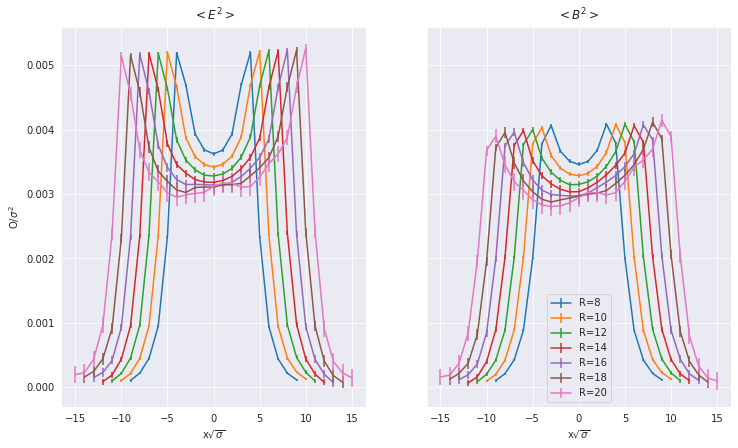

<Figure size 432x288 with 0 Axes>

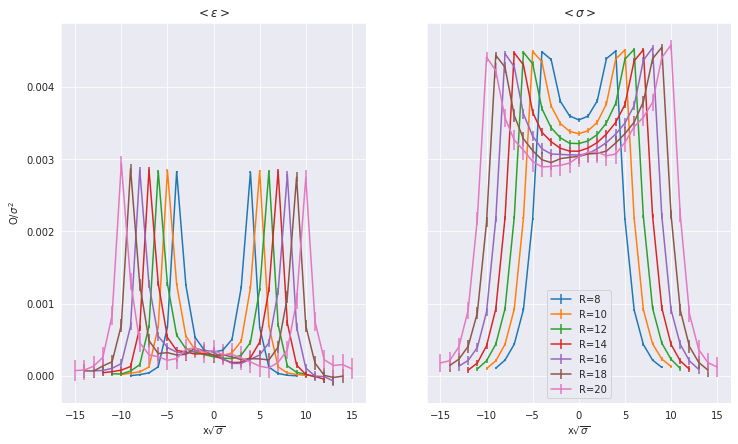

40 16


<Figure size 432x288 with 0 Axes>

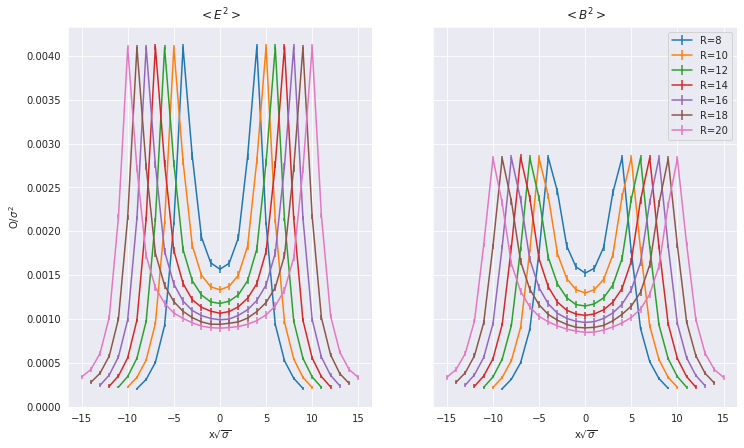

<Figure size 432x288 with 0 Axes>

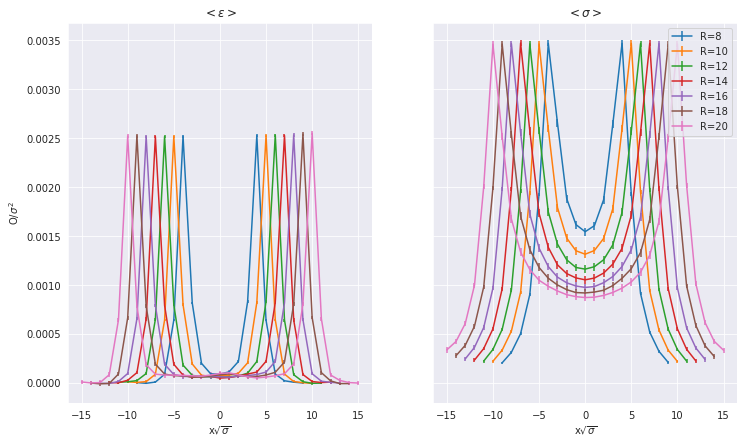

<Figure size 432x288 with 0 Axes>

In [3]:
mu1=[0, 40]
T1=[16]
for mu in mu1:
    for T in T1:
        print(mu, T)
        R=[8, 10, 12, 14, 16, 18, 20]
        make_plots_X(mu, [T1, R], ['T', 'R'], 1, 'R', r"x$\sqrt{\sigma}$", r"O/$\sigma^{2}$", [r"$<E^{2}>$", r"$<B^{2}>$"], ['electric', 'magnetic'], '', 'mon_wl')
        make_plots_X(mu, [T1, R], ['T', 'R'], 1, 'R', r"x$\sqrt{\sigma}$", r"O/$\sigma^{2}$", [r"$<\epsilon>$", r"$<\sigma>$"], ['energy', 'action'], '', 'mon_wl')

In [3]:
mu1=[0, 40]
T=[10, 12, 14, 16, 18, 20]
for mu in mu1:
        print(mu)
        R=[16]
        make_plots_X(mu, [T, R], ['T', 'R'], 0, 'T', r"x$\sqrt{\sigma}$", r"O/$\sigma^{2}$", [r"$<E^{2}>$", r"$<B^{2}>$"], ['electric', 'magnetic'], '', 'mon_wl')
        make_plots_X(mu, [T, R], ['T', 'R'], 0, 'T', r"x$\sqrt{\sigma}$", r"O/$\sigma^{2}$", [r"$<\epsilon>$", r"$<\sigma>$"], ['energy', 'action'], '', 'mon_wl')

0


OSError: /home/ilya/lattice/observables/data/flux_tube/mon_wl/mu0.00/electric_T=14_R=16 not found.

0 16


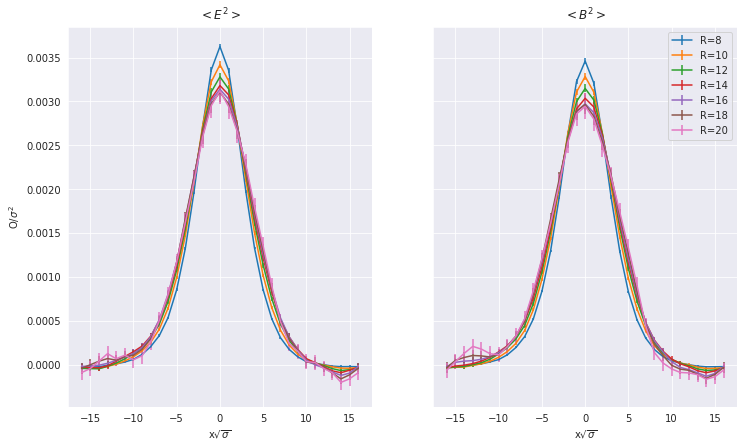

<Figure size 432x288 with 0 Axes>

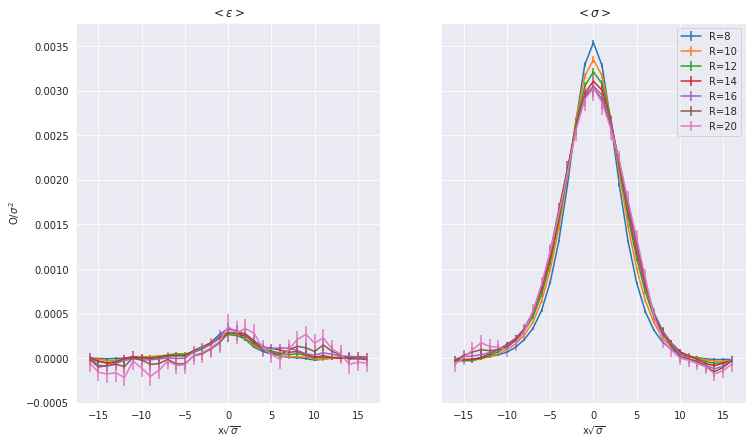

40 16


<Figure size 432x288 with 0 Axes>

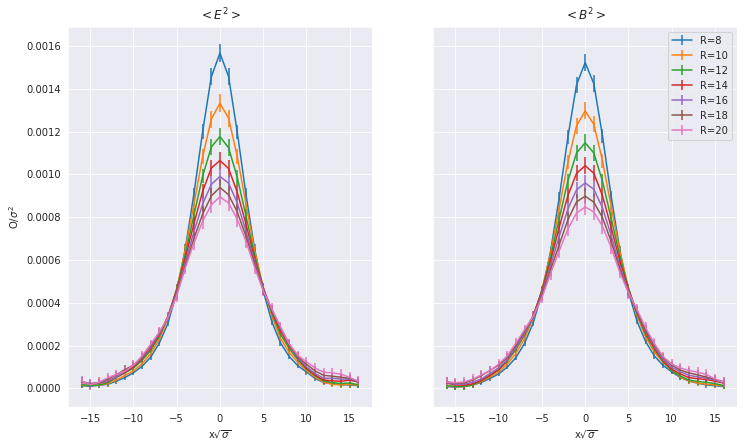

<Figure size 432x288 with 0 Axes>

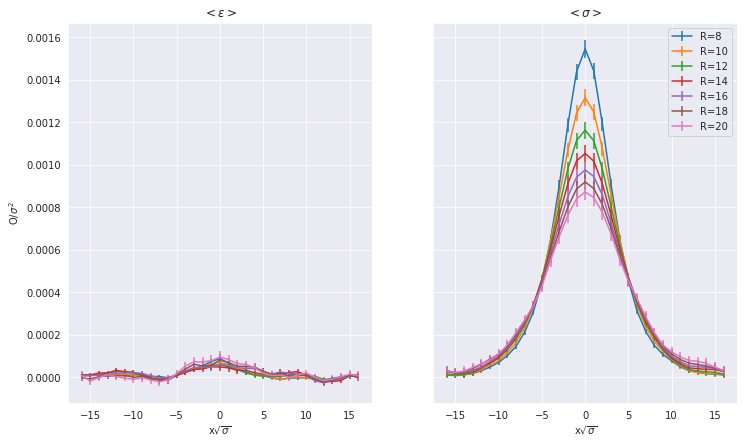

<Figure size 432x288 with 0 Axes>

In [5]:
mu1=[0, 40]
T1=[16]
for mu in mu1:
    for T in T1:
        print(mu, T)
        R=[8, 10, 12, 14, 16, 18, 20]
        make_plots_X(mu, [T1, R], ['T', 'R'], 1, 'R', r"x$\sqrt{\sigma}$", r"O/$\sigma^{2}$", [r"$<E^{2}>$", r"$<B^{2}>$"], ['electric', 'magnetic'], '_x', 'mon_wl')
        make_plots_X(mu, [T1, R], ['T', 'R'], 1, 'R', r"x$\sqrt{\sigma}$", r"O/$\sigma^{2}$", [r"$<\epsilon>$", r"$<\sigma>$"], ['energy', 'action'], '_x', 'mon_wl')

0


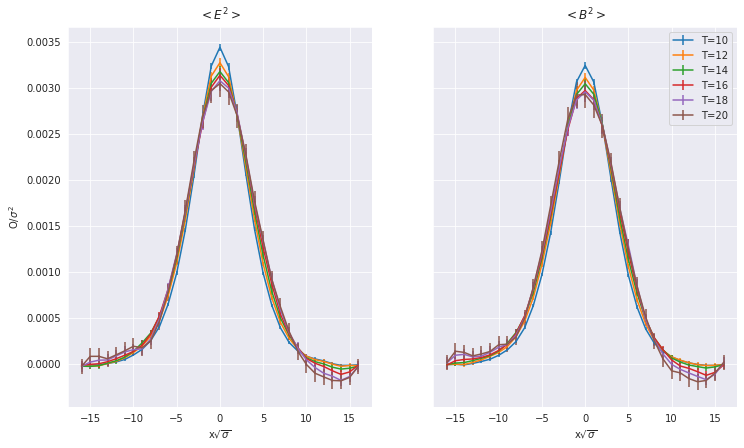

<Figure size 432x288 with 0 Axes>

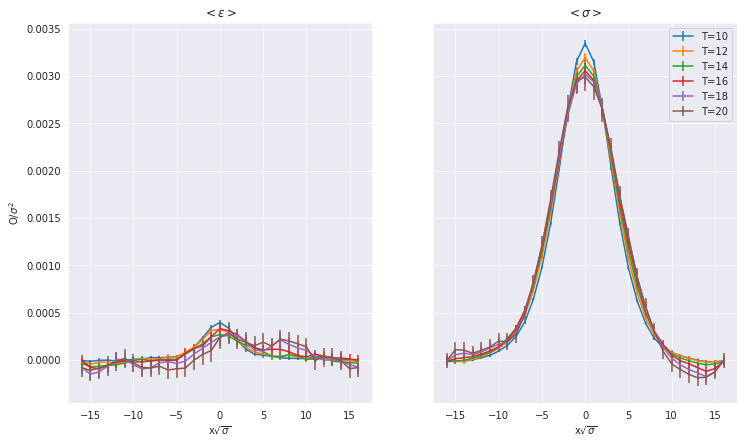

40


<Figure size 432x288 with 0 Axes>

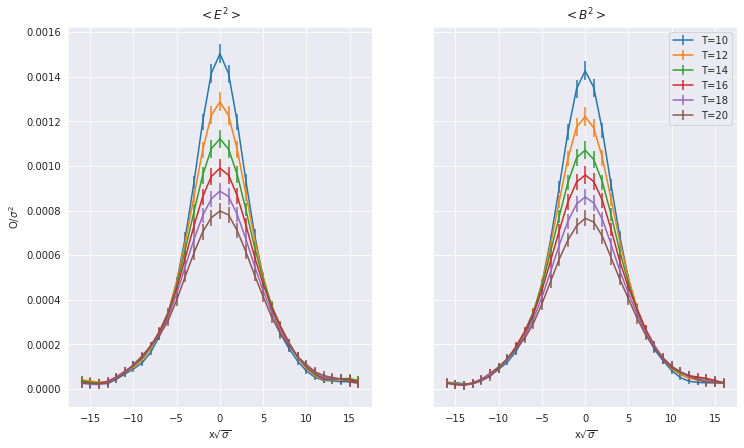

<Figure size 432x288 with 0 Axes>

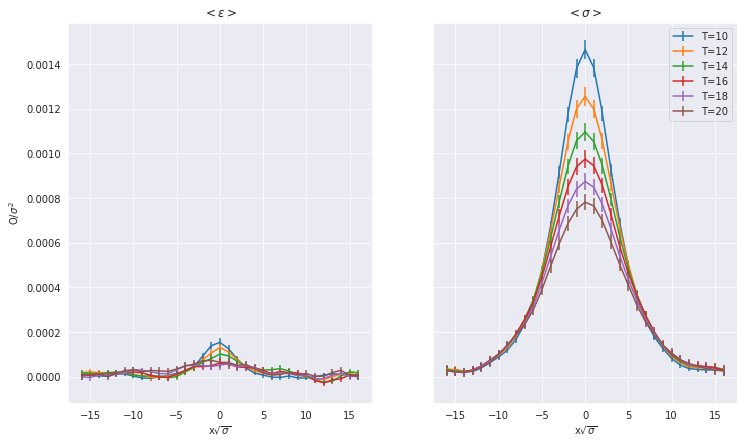

<Figure size 432x288 with 0 Axes>

In [6]:
mu1=[0, 40]
T=[10, 12, 14, 16, 18, 20]
for mu in mu1:
        print(mu)
        R=[16]
        make_plots_X(mu, [T, R], ['T', 'R'], 0, 'T', r"x$\sqrt{\sigma}$", r"O/$\sigma^{2}$", [r"$<E^{2}>$", r"$<B^{2}>$"], ['electric', 'magnetic'], '_x', 'mon_wl')
        make_plots_X(mu, [T, R], ['T', 'R'], 0, 'T', r"x$\sqrt{\sigma}$", r"O/$\sigma^{2}$", [r"$<\epsilon>$", r"$<\sigma>$"], ['energy', 'action'], '_x', 'mon_wl')

In [3]:
mu1=[0]
T1=[8]
for mu in mu1:
    for T in T1:
        print(mu, T)
        R=[8]
        #R=[6]
        make_plots_X(mu, [T1, R], ['T', 'R'], 1, 'R', r"x$\sqrt{\sigma}$", r"O/$\sigma^{2}$", [r"$<E^{2}>$", r"$<B^{2}>$"], ['electric', 'magnetic'], '', 'su2')
        make_plots_X(mu, [T1, R], ['T', 'R'], 1, 'R', r"x$\sqrt{\sigma}$", r"O/$\sigma^{2}$", [r"$<\epsilon>$", r"$<\sigma>$"], ['energy', 'action'], '', 'su2')

0 8


OSError: /home/ilya/lattice/observables/data/flux_tube/su2/mu0.00/electric_T=8_R=8 not found.

0 16


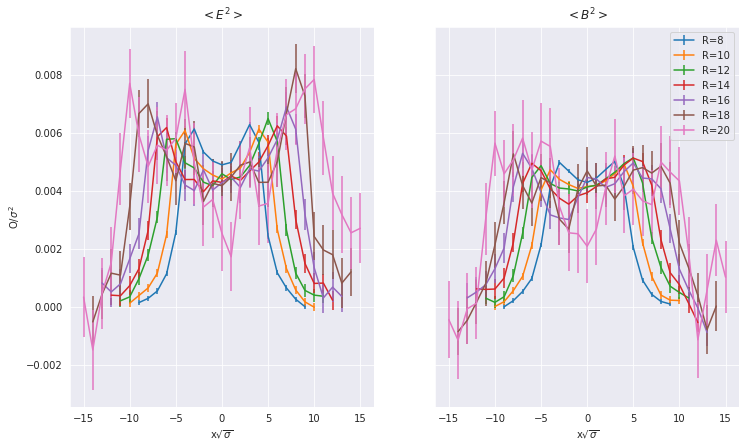

<Figure size 432x288 with 0 Axes>

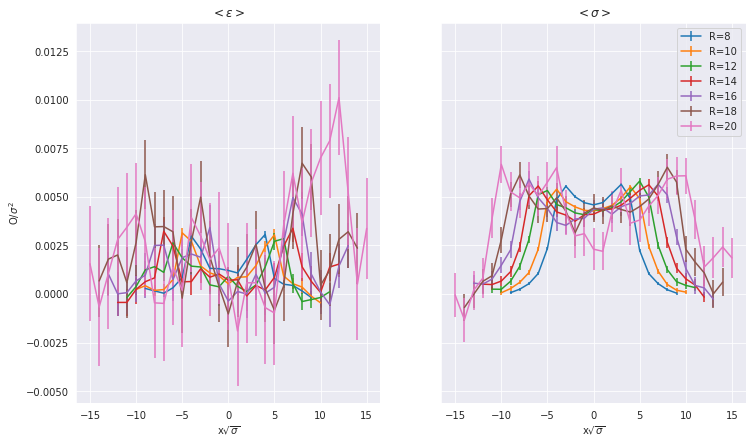

40 16


<Figure size 432x288 with 0 Axes>

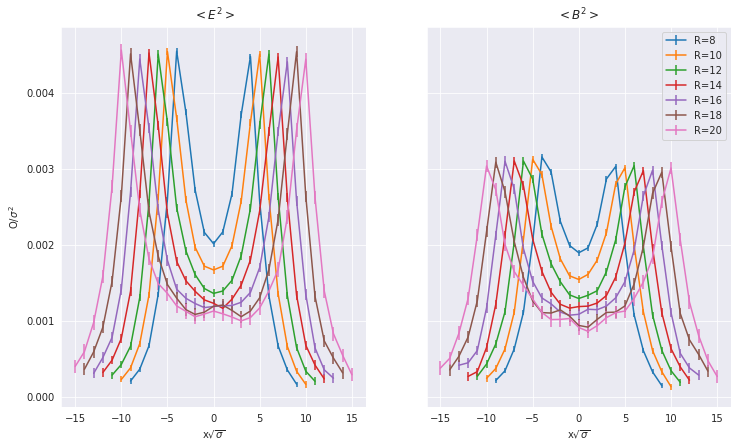

<Figure size 432x288 with 0 Axes>

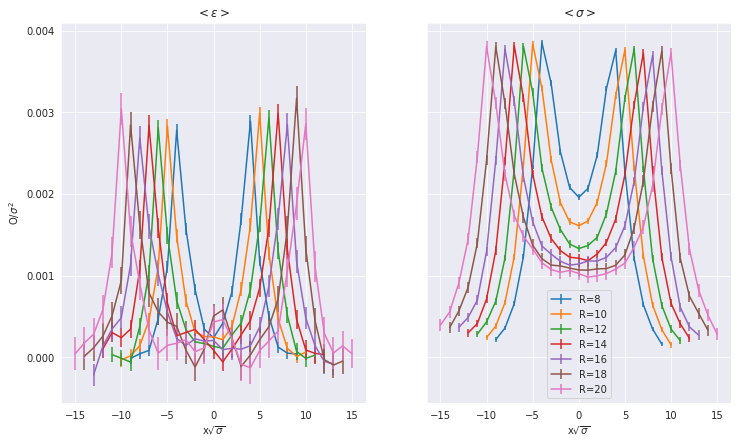

<Figure size 432x288 with 0 Axes>

In [8]:
mu1=[0, 40]
T1=[16]
for mu in mu1:
    for T in T1:
        print(mu, T)
        R=[8, 10, 12, 14, 16, 18, 20]
        make_plots_X(mu, [T1, R], ['T', 'R'], 1, 'R', r"x$\sqrt{\sigma}$", r"O/$\sigma^{2}$", [r"$<E^{2}>$", r"$<B^{2}>$"], ['electric', 'magnetic'], '', 'mag')
        make_plots_X(mu, [T1, R], ['T', 'R'], 1, 'R', r"x$\sqrt{\sigma}$", r"O/$\sigma^{2}$", [r"$<\epsilon>$", r"$<\sigma>$"], ['energy', 'action'], '', 'mag')

0 10 8


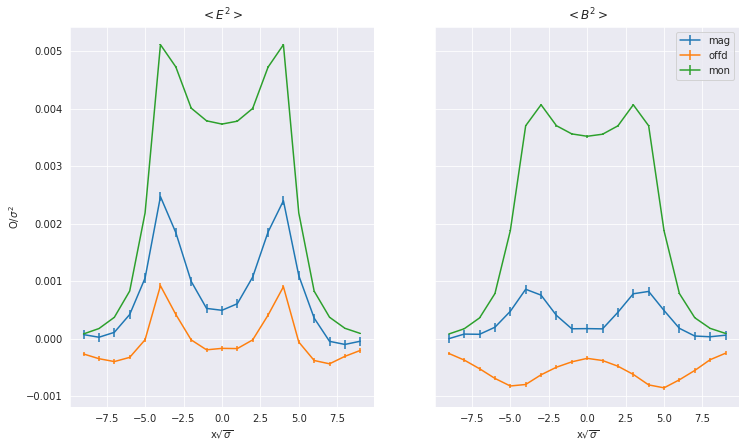

<Figure size 432x288 with 0 Axes>

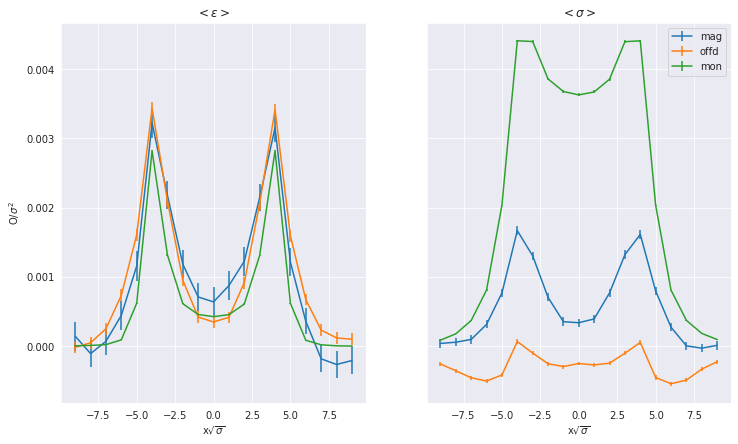

0 10 16


<Figure size 432x288 with 0 Axes>

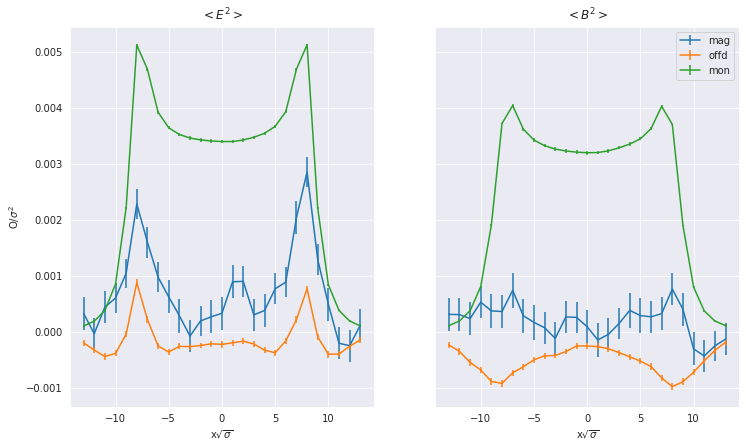

<Figure size 432x288 with 0 Axes>

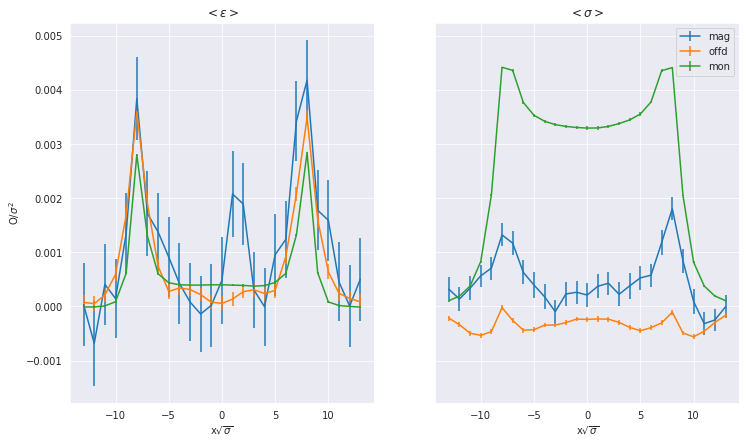

25 10 8


<Figure size 432x288 with 0 Axes>

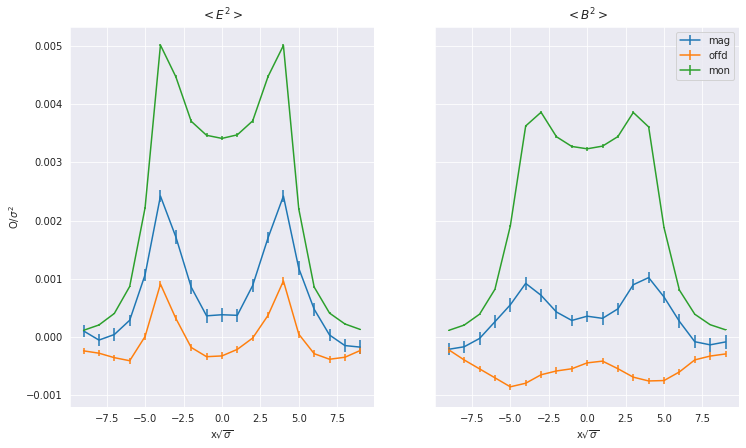

<Figure size 432x288 with 0 Axes>

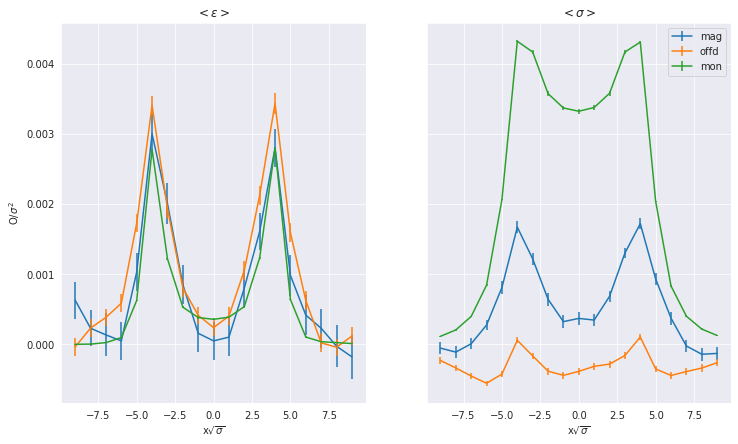

25 10 16


<Figure size 432x288 with 0 Axes>

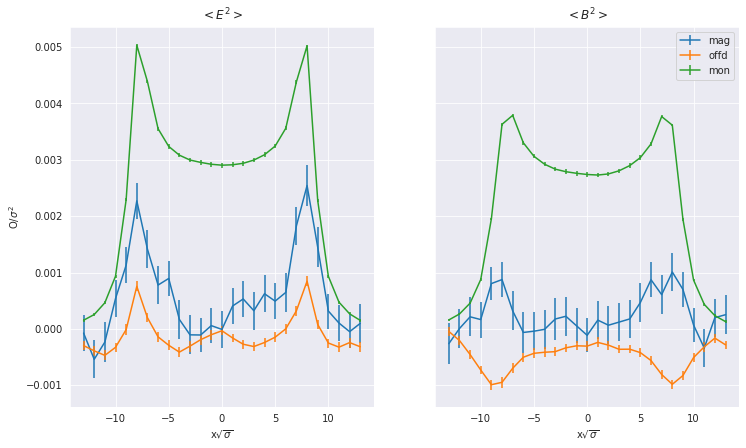

<Figure size 432x288 with 0 Axes>

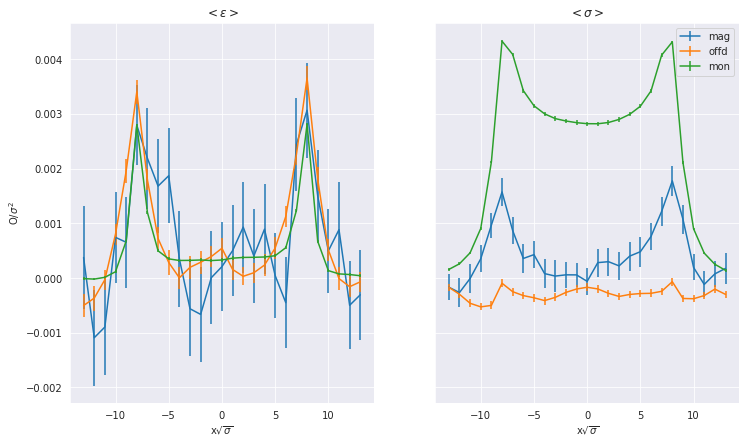

40 10 8


<Figure size 432x288 with 0 Axes>

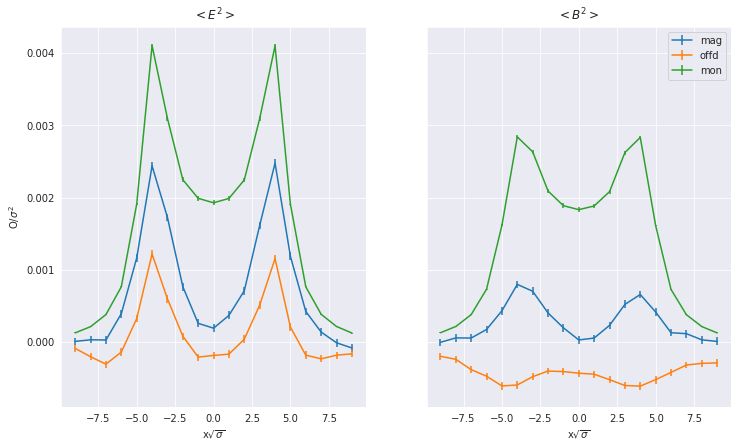

<Figure size 432x288 with 0 Axes>

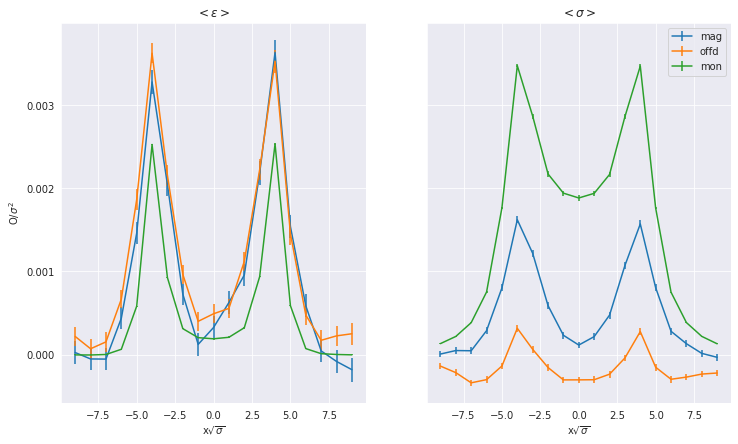

40 10 16


<Figure size 432x288 with 0 Axes>

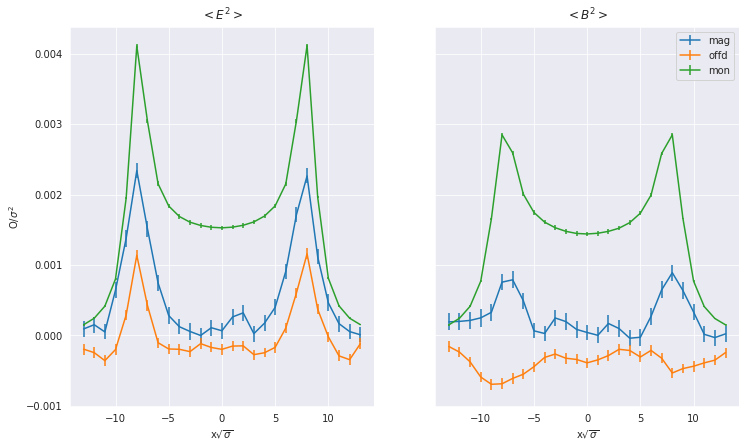

<Figure size 432x288 with 0 Axes>

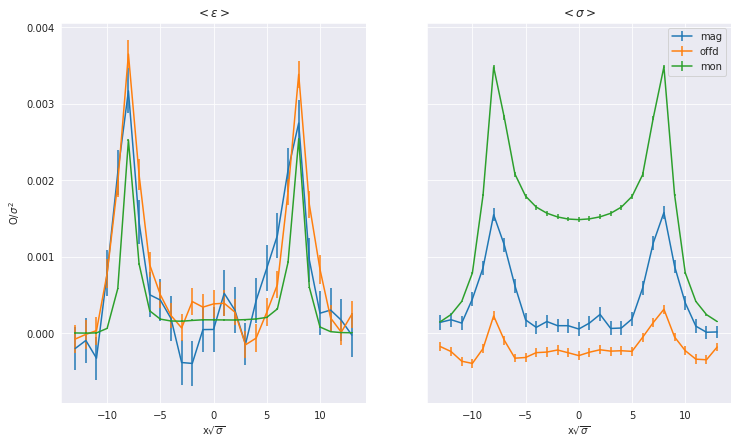

<Figure size 432x288 with 0 Axes>

In [4]:
#mu = [0, 40]
#T = [8, 10, 12]
#R = [8, 10, 12, 14, 16]
mu = [0, 25, 40]
T = [10]
R = [8, 16]
for i in mu:
    for j in T:
        for k in R:
            print(i, j, k)
            make_plots_together(i, j, k, r"x$\sqrt{\sigma}$", r"O/$\sigma^{2}$", [r"$<E^{2}>$", r"$<B^{2}>$"], ['electric', 'magnetic'], '')
            make_plots_together(i, j, k, r"x$\sqrt{\sigma}$", r"O/$\sigma^{2}$", [r"$<\epsilon>$", r"$<\sigma>$"], ['energy', 'action'], '')